In [1]:
#load library
from scipy.ndimage import shift
import matplotlib.pyplot as plt
from scipy import datasets
from openpiv.tools import imread
from pylab import *
import cv2

In [5]:
# Read the image
impo_a = cv2.imread('try3-exp000000.T000.D000.P000.H000.LA.TIF', cv2.IMREAD_UNCHANGED)

#shift image vertically
#image_shifted_vertically = shift(image,shift= (0, 1),mode='reflect')
impo_b= cv2.imread('try3-exp000290.T000.D000.P000.H000.LA.TIF', cv2.IMREAD_UNCHANGED)

# Get image properties
height, width = impo_a.shape[:2]
channels = impo_a.shape[2] if len(impo_a.shape) > 2 else 1
bit_depth = impo_a.dtype

print("Image Properties:")
print("Dimensions: {} x {}".format(width, height))
print("Channels:", channels)
print("Bit Depth:", bit_depth)
#the image has a bit depth of uint16 and we are intersted in unit8 for that a nurmalization is needed!

Image Properties:
Dimensions: 3376 x 2712
Channels: 1
Bit Depth: uint16


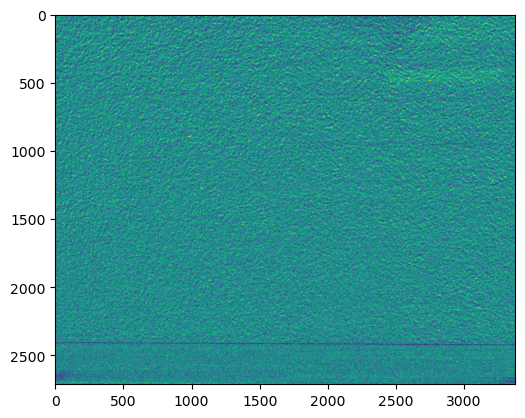

In [6]:
plt.imshow(impo_a-impo_b)

In [7]:
#nurmalize image

impo_a=cv2.normalize(impo_a, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
image_a_mean=impo_a-mean(impo_a, axis=(0,1)) #equation 2

#shift image vertically
#image_shifted_vertically = shift(image,shift= (0, 1),mode='reflect')
impo_b= cv2.normalize(impo_b, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
image_b_mean=impo_b-mean(impo_b, axis=(0,1)) #equation 2

#image_shifted_both_directions = shift(image, (100, 4))#,mode='reflect')



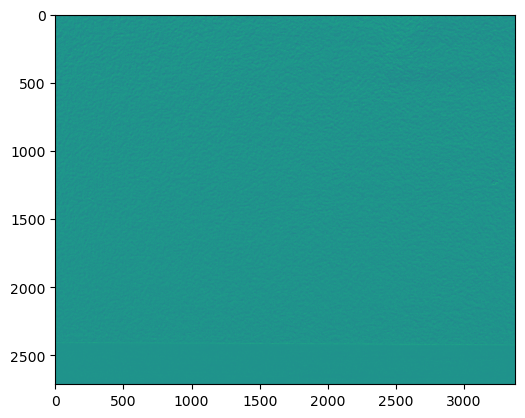

In [8]:
plt.imshow(image_a_mean - image_b_mean)

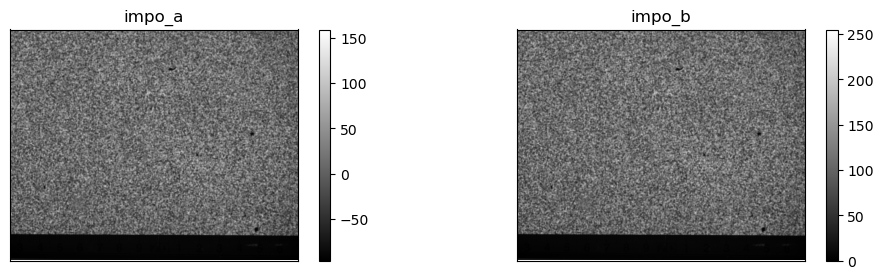

In [9]:
#plot images
# Set a larger figure size
figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.imshow(image_a_mean, cmap='gray')
plt.title('impo_a'), plt.xticks([]), plt.yticks([])
colorbar()

# Plotting phase spectrum
plt.subplot(1, 2, 2)
plt.imshow(impo_b, cmap='gray')  # 'hsv' colormap for phase
plt.title('impo_b'), plt.xticks([]), plt.yticks([])
#colorbar()


colorbar()

plt.show()

In [10]:
#correlate2d

def correlate2d(image1, image2):

    #Fourier 
    I_1 = np.fft.rfft2(image1)  #equation 3
    I_2 = np.fft.rfft2(image2)  #equation 3

    #cross power spectrum 
    CPS= I_1*I_2.conjugate() #equation 6
    NCPS= CPS/ np.abs(CPS)

    #cross-correlation
    R_1= fftshift(np.fft.irfft2(NCPS)) #equation 10 #real(R_1)

    return R_1


C:\Users\PIV\AppData\Local\Temp\ipykernel_4728\166215056.py:11: RuntimeWarning: invalid value encountered in divide
  NCPS= CPS/ np.abs(CPS)


-16 -16


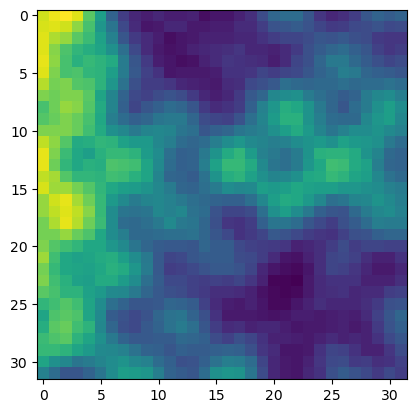

In [19]:
ia = image_a_mean[:32,:32]
plt.imshow(ia)
ib =image_b_mean[:32, :32]#shift(ia,shift= (-3, 4),mode='reflect') #(shift in x, shift in y)

R = correlate2d(ib,ia)
plt.imshow(real(R))
i,j = unravel_index(R.argmax(),R.shape)
print(i-16,j-16) #relative to the center of the image``

0

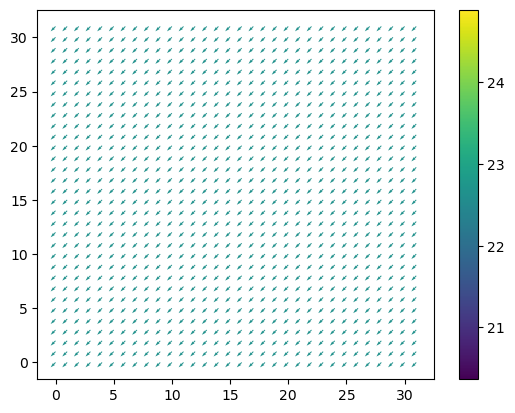

In [20]:
# Get the shape of the image array
rows, cols = ia.shape

# Create x and y coordinates using meshgrid
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
u=i-16
v=j-16
M = sqrt(pow(array(u), 2) + pow(array(v), 2))

quiver(x,y,u,v,M)
colorbar()

In [33]:
#ia.shape
M 

22.627416997969522

In [11]:
#referance image

a=image_a_mean[:, :]

#shefted image
b=image_b_mean[:, :]
b.shape 

(2712, 3376)

C:\Users\PIV\AppData\Local\Temp\ipykernel_27492\166215056.py:11: RuntimeWarning: invalid value encountered in divide
  NCPS= CPS/ np.abs(CPS)


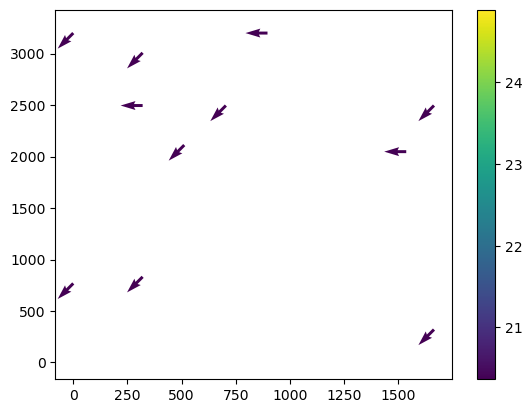

In [16]:

iw = (64, 64)
#a=image[:, :]
#b=image_shifted_vertically[:, :]

# Initialize lists for storing results
x, y, u, v = [], [], [], []

for k in range(0, a.shape[0]-1000,64):
    for m in range(0, a.shape[1],64):
        # Check if the current block is within the image boundaries
        if k + iw[0] <= a.shape[0] and m + iw[1] <= a.shape[1]:

          ia = a[k:k+iw[0], m:m+iw[1]]
          ib = b[k:k+iw[0], m:m+iw[1]]
        
         # Cross-correlation
          c = correlate2d(ib, ia)
          i, j = (unravel_index(c.argmax(), c.shape))
        
          # Append values to respective lists
          rows, cols=ia.shape
          x.append(np.meshgrid(np.arange(cols)))
          y.append(np.meshgrid(np.arange(rows)))
          u.append((i - 32))
          v.append((j - 32))

          # Calculate magnitude for this particular patch
          M = sqrt(((i - 16)*1)**2 + ((j - 16)*1)**2) # 0.2 is for scalling 
          

            # Plotting vectors for this patch
          plt.quiver(k , m , (i - 32), (j - 32), M) # 0.2 is for scalling 

# Display colorbar
plt.colorbar()

plt.show()


0 -13


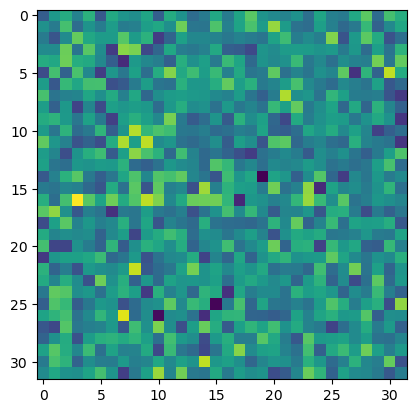

In [27]:
ia = a[500:532,500:532]
plt.imshow(ia)
ib = b[500:532,3000:3032]#image_shifted_vertically[:32, :32]#shift(ia,shift= (-3, 4),mode='reflect') #(shift in x, shift in y)

R = correlate2d(ib,ia)
plt.imshow(real(R))
i,j = unravel_index(R.argmax(),R.shape)
print(i-16,j-16) #relative to the center of the image